In this tutorial you'll learn all about **histograms** and **density plots**.

# Set up the notebook

As always, we begin by setting up the coding environment.  (_This code is hidden, but you can un-hide it by clicking on the "Code" button immediately below this text, on the right._)

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Select a dataset

We'll work with a dataset of 150 different flowers, or 50 each from three different species of iris (*Iris setosa*, *Iris versicolor*, and *Iris virginica*).

![tut4_iris](https://i.imgur.com/RcxYYBA.png)

# Load and examine the data

Each row in the dataset corresponds to a different flower.  There are four measurements: the sepal length and width, along with the petal length and width.  We also keep track of the corresponding species. 

In [2]:
# Path of the file to read
iris_filepath = "../input/iris.csv"

# Read the file into a variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Histograms

Say we would like to create a **histogram** to see how petal length varies in iris flowers.  We can do this with the `sns.distplot` command.  

<ipython-input-3-dce58301f500>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)


<Axes: xlabel='Petal Length (cm)'>

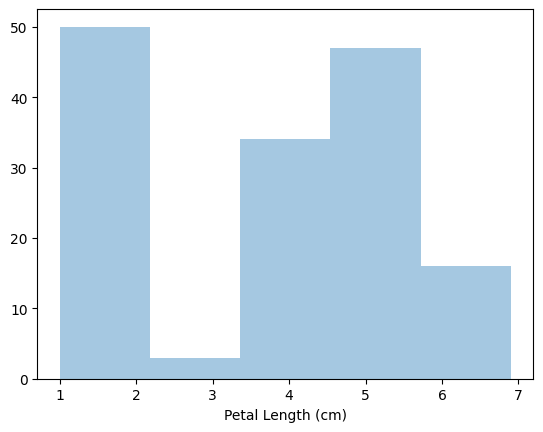

In [3]:
# Histogram 
sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)

We customize the behavior of the command with two additional pieces of information:
- `a=` chooses the column we'd like to plot (_in this case, we chose `'Petal Length (cm)'`_).
- `kde=False` is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot.

# Density plots

The next type of plot is a **kernel density estimate (KDE)** plot.  In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.   

To make a KDE plot, we use the `sns.kdeplot` command.  Setting `shade=True` colors the area below the curve (_and `data=` has identical functionality as when we made the histogram above_).

<ipython-input-4-75cc55af54ab>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Petal Length (cm)', ylabel='Density'>

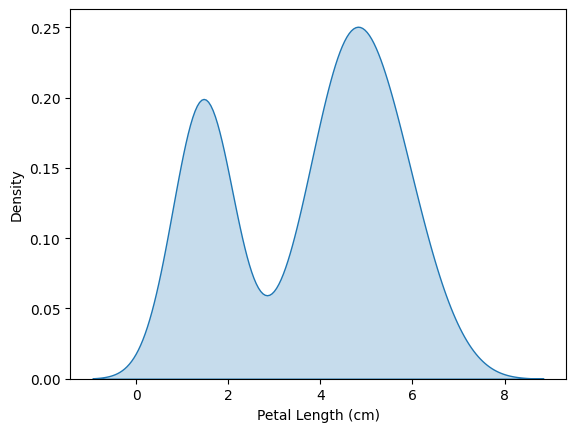

In [4]:
# KDE plot 
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

# 2D KDE plots

We're not restricted to a single column when creating a KDE plot.  We can create a **two-dimensional (2D) KDE plot** with the `sns.jointplot` command.

In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely. 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

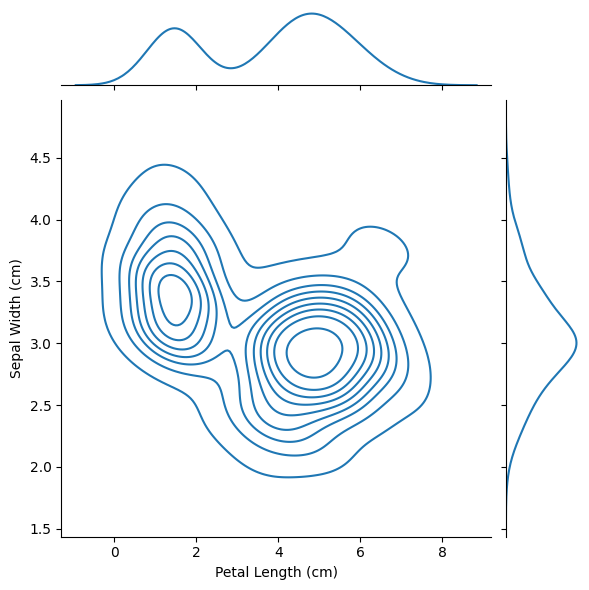

In [5]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")

Note that in addition to the 2D KDE plot in the center,
- the curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, `iris_data['Petal Length (cm)']`), and
- the curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, `iris_data['Sepal Width (cm)']`).

# Color-coded plots

For the next part of the tutorial, we'll create plots to understand differences between the species.  To accomplish this, we begin by breaking the dataset into three separate files, with one for each species.

In [6]:
# Paths of the files to read
iris_set_filepath = "../input/iris_setosa.csv"
iris_ver_filepath = "../input/iris_versicolor.csv"
iris_vir_filepath = "../input/iris_virginica.csv"

# Read the files into variables 
iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")

# Print the first 5 rows of the Iris versicolor data
iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In the code cell below, we create a different histogram for each species by using the `sns.distplot` command (_as above_) three times.  We use `label=` to set how each histogram will appear in the legend.

<ipython-input-7-e00f9a78aa0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=iris_set_data['Petal Length (cm)'], label="Iris-setosa", kde=False)
<ipython-input-7-e00f9a78aa0c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", kde

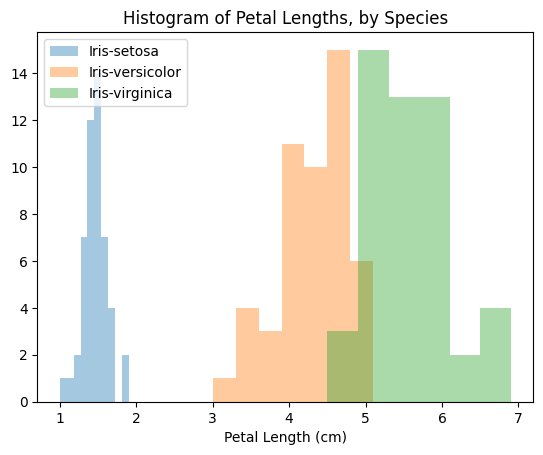

In [7]:
# Histograms for each species
sns.distplot(a=iris_set_data['Petal Length (cm)'], label="Iris-setosa", kde=False)
sns.distplot(a=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", kde=False)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

In this case, the legend does not automatically appear on the plot. To force it to show (for any plot type), we can always use `plt.legend()`.

We can also create a KDE plot for each species by using `sns.kdeplot` (_as above_).  Again, `label=` is used to set the values in the legend.

<ipython-input-8-fa0dfd3836d4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-8-fa0dfd3836d4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

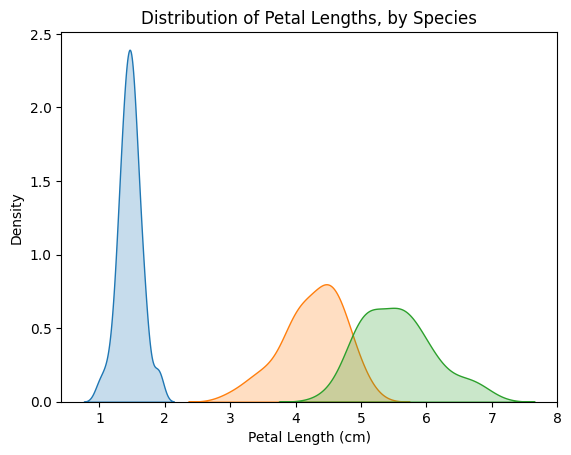

In [8]:
# KDE plots for each species
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

One interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where _Iris versicolor_ and _Iris virginica_ seem to have similar values for petal length, while _Iris setosa_ belongs in a category all by itself. 

In fact, according to this dataset, we might even be able to classify any iris plant as *Iris setosa* (as opposed to *Iris versicolor* or *Iris virginica*) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be *Iris setosa*!

# What's next?

Put your new skills to work in a **[coding exercise](https://www.kaggle.com/kernels/fork/2951534)**!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*